In [2]:
import nltk


In [77]:
# SOME BASICS 

In [7]:
import pandas as pd

dataset = pd.read_csv('C:/Users/Anes/Downloads/REF TWEETS.csv')

In [8]:
print(len(dataset))

4000


In [9]:
print(dataset.info())
dataset.head(-10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None


,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral
...,...,...,...,...,...
3985,3986,2022-12-18 18:47:48+00:00,0,The first female referee in the WORLD CUP WOAH,Neutral
3986,3987,2022-12-18 18:45:29+00:00,0,Referee had eagle eyes. The dive in the penalt...,Neutral
3987,3988,2022-12-18 18:44:50+00:00,10,The best World Cup tournament I have ever seen...,Positive
3988,3989,2022-12-18 18:44:31+00:00,2,"Nah let’s keep it real, this was the most rigg...",Negative


In [10]:
dataset.head(5)

,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral


In [11]:
print(dataset['Number of Likes'])

0       5
1       1
2       7
3       1
4       0
       ..
3995    8
3996    0
3997    0
3998    0
3999    3
Name: Number of Likes, Length: 4000, dtype: int64


In [12]:
dataset_text = (dataset['Tweet']).to_list()
print(dataset_text)

['The first female referee at a Men’s World Cup is from Philly. Tough 🔥', "North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. \n#WorldCup2022 #NorthKorea\n#Bracelet #FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022 #onelove", "If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54)", 'NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”\n\nWorld Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?”', "Possibly imagining it, but feel like there are fewer caustic player/referee intera

In [13]:
raw_dataset_text = "".join(dataset_text[:314])
raw_dataset_text

'The first female referee at a Men’s World Cup is from Philly. Tough 🔥North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the \'love\' bracelet will be a capital crime. \n#WorldCup2022 #NorthKorea\n#Bracelet #FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022 #oneloveIf you\'re wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54)NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”\n\nWorld Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?”Possibly imagining it, but feel like there are fewer caustic player/referee interactions at the 

In [14]:
words = raw_dataset_text.split(" ")
print(words)

['The', 'first', 'female', 'referee', 'at', 'a', 'Men’s', 'World', 'Cup', 'is', 'from', 'Philly.', 'Tough', '🔥North', 'Korea', 'will', 'host', 'the', 'World', 'Cup', 'in', '2030.', 'Winning', 'against', 'North', 'Korea', 'is', 'not', 'allowed.', 'The', 'Great', 'Leader', 'will', 'be', 'the', 'referee', 'in', 'every', 'game.', 'Wearing', 'the', "'love'", 'bracelet', 'will', 'be', 'a', 'capital', 'crime.', '\n#WorldCup2022', '#NorthKorea\n#Bracelet', '#FIFAWorldCup\u202f\u202f\u202f\n#FIFAWorldCup2022', '#oneloveIf', "you're", 'wondering', 'why', 'there', 'has', 'been', 'so', 'much', 'stoppage', 'time', 'at', 'the', 'World', 'Cup,', 'check', 'out', 'the', 'latest', 'episode', 'of', 'Gab', 'and', 'Jules', 'Meets', 'with', '@Marcotti', 'and', '@LaurensJulien,', 'where', 'they', 'interviewed', 'former', 'referee', 'and', 'Chairman', 'of', 'the', 'FIFA', 'Referees', 'Committee,', 'Pierluigi', 'Collina', '(34:54)NFL', 'referee:', '“We', 'will', 'scrutinize', 'every', 'angle', 'of', 'tape', 't

In [78]:
# 1. USING THE VADER SENTIMENT ANALYZER TOOL
# 2. USING THAT TOOL, BUT WITH SENTIMENTP - POLARITY SCORES
# 3. MAKING A COMPARISON BETWEEN THESE TWO

In [72]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming you have a DataFrame named 'df' with the mentioned columns
# If your 'date created' column is in a different format, you may need to parse it accordingly

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row in the 'tweet_column_name' column
tweet_column_name = 'Tweet'  # Replace with the actual name of your tweet column
df['sentimentP'] = df[tweet_column_name].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
result_df = df[['Tweet', 'sentiment_class']]
print(result_df)

# Save the DataFrame to a new CSV file
existing_file_path = 'C:/Users/Anes/Downloads/s_sen.csv'  # Replace with the path to your existing CSV file
df.to_csv(existing_file_path, index=False)


                                                  Tweet sentiment_class
0     The first female referee at a Men’s World Cup ...        Negative
1     North Korea will host the World Cup in 2030. W...        Negative
2     If you're wondering why there has been so much...         Neutral
3     NFL referee: “We will scrutinize every angle o...        Negative
4     Possibly imagining it, but feel like there are...        Positive
...                                                 ...             ...
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...        Negative
3996  How wonderful in this day and age.. at the Wor...        Positive
3997  World cup: referees get medals after the final...         Neutral
3998  This argentina the whole journey Copa America ...        Positive
3999  Credit must also go to the Polish referee Marc...        Positive

[4000 rows x 2 columns]


In [71]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
# VADER sentiment analyzer
# Assuming you have a DataFrame named 'df' with the mentioned columns
# If your 'date created' column is in a different format, you may need to parse it accordingly

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each row in the 'tweet_column_name' column
tweet_column_name = 'Tweet'  # Replace with the actual name of your tweet column
df['sentimentP'] = df[tweet_column_name].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display NLTK VADER sentiment scores and actual sentiment labels
result_df = df[['Tweet', 'sentimentP', 'sentiment_class']]
print(result_df)


                                                  Tweet  sentimentP  \
0     The first female referee at a Men’s World Cup ...     -0.1280   
1     North Korea will host the World Cup in 2030. W...     -0.5258   
2     If you're wondering why there has been so much...      0.0000   
3     NFL referee: “We will scrutinize every angle o...     -0.4871   
4     Possibly imagining it, but feel like there are...      0.5792   
...                                                 ...         ...   
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...     -0.1877   
3996  How wonderful in this day and age.. at the Wor...      0.0191   
3997  World cup: referees get medals after the final...      0.0000   
3998  This argentina the whole journey Copa America ...      0.4404   
3999  Credit must also go to the Polish referee Marc...      0.7845   

     sentiment_class  
0           Negative  
1           Negative  
2            Neutral  
3           Negative  
4           Positive  
...      

In [75]:
import pandas as pd

# Load the original sentiment CSV file
original_sentiment_file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'
df_original = pd.read_csv(original_sentiment_file_path)

# Load the new sentiment (VADER) CSV file
vader_sentiment_file_path = 'C:/Users/Anes/Downloads/s_sen.csv'
df_vader = pd.read_csv(vader_sentiment_file_path)

# Display the first 10 rows and count differences
comparison_df = pd.DataFrame({
    'Original_Sentiment': df_original['Sentiment'].head(10),
    'VADER_Sentiment': df_vader['sentiment_class'].head(10),
})

comparison_df['Difference'] = comparison_df['Original_Sentiment'] != comparison_df['VADER_Sentiment']

print(comparison_df, '\n', df['Tweet'])
print("\nCount of Differences:", comparison_df['Difference'].sum())


  Original_Sentiment VADER_Sentiment  Difference
0            Neutral        Negative        True
1            Neutral        Negative        True
2            Neutral         Neutral       False
3           Negative        Negative       False
4            Neutral        Positive        True
5            Neutral        Positive        True
6           Negative        Negative       False
7           Negative        Positive        True
8            Neutral        Negative        True
9           Negative        Negative       False 
 0       The first female referee at a Men’s World Cup ...
1       North Korea will host the World Cup in 2030. W...
2       If you're wondering why there has been so much...
3       NFL referee: “We will scrutinize every angle o...
4       Possibly imagining it, but feel like there are...
                              ...                        
3995    Meanwhile, Mbappe gave us a World Cup we’d nev...
3996    How wonderful in this day and age.. at the Wo

<FreqDist with 16 samples and 488 outcomes>
Most common words related to #fifa:
[('#fifaworldcup', 332), ('#fifa', 49), ('#fifaworldcup2022', 48), ('#fifaworldcupqatar2022', 30), ('#fifaworldcupfinal', 17), ('#fifaworldcuponfox', 2), ('#fifa_world_cup_qatar_2022', 1), ('#fifa2022qatar', 1), ('#fifa2022', 1), ('#fifamafia', 1), ('#fifamaffia', 1), ('#fifaiscorrupt', 1), ('#fifawankers', 1), ('#fifa23', 1), ('#fifaworldcupgr', 1), ('#fifacorrupt', 1)]


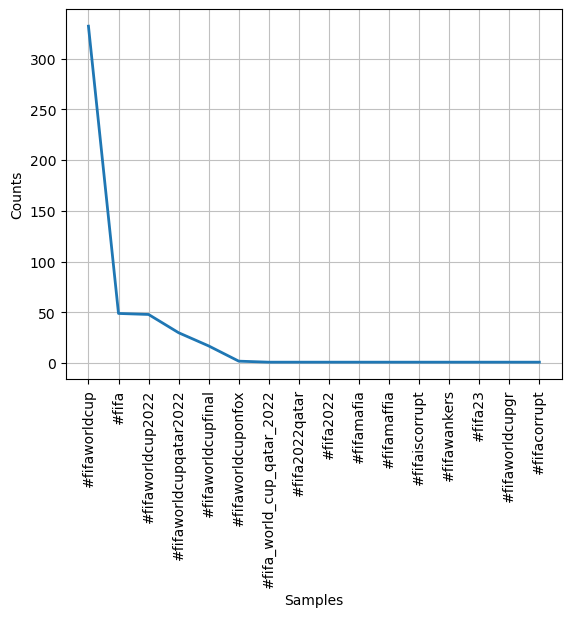

<Axes: xlabel='Samples', ylabel='Counts'>

In [74]:
import pandas as pd
import re
from nltk.probability import FreqDist

# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa and its variations
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = FreqDist(fifa_variations)
print(freq_dist)
# Print the most common words
print("Most common words related to #fifa:")
print(freq_dist.most_common(20))  # Change 10 to the desired number of top words
freq_dist.plot(50, cumulative=False)

In [21]:
import pandas as pd
from nltk import collocations

# Assuming your tweets are in the 'Tweet' column, replace it with your actual column name
tweets = df['Tweet'].dropna().astype(str).str.lower().str.replace(r'\b\w\b', '').str.cat(sep=' ')

# Tokenize the tweets
tokens = word_tokenize(tweets)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Find collocations
bigram_measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(filtered_tokens)
collocations = finder.nbest(bigram_measures.pmi, 10)  # You can adjust the number of collocations you want to retrieve
# Pointwise mutual information
print(collocations)


[('100k', 'month'), ('150k', 'rwfs'), ('1970', '1980'), ('1998', 'sol'), ('1mm', 'circumference'), ('2012', 'canmnt'), ('2022worldcup', 'badrefereedecision'), ('29th', 'november'), ('31', 'statuses'), ('70s', '80s')]


In [80]:
# ACCURACY OF WORDS THAT CONTAIN FIFA USING BIGRAM FEATURES, LEST'S SAY, MOST-COMMON BIGRAMS
# ACCURACY OF WORDS THT CONTAIN #FIFA
# WORD CLOUD

In [86]:
import pandas as pd
from nltk import word_tokenize, bigrams
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from nltk.probability import FreqDist

# Tokenize the text
tokens = word_tokenize(all_text.lower())  # Convert to lowercase for case-insensitive matching

# Identify bigrams containing 'fifa' but not 'fifa'
fifa_bigrams = [bigram for bigram in bigrams(tokens) if 'fifa' in bigram and 'fifa' not in bigram]

# Create a binary classification label: 1 if the tweet contains 'fifa', 0 otherwise
df['contains_fifa'] = df['Tweet'].apply(lambda x: 1 if 'fifa' in x.lower() else 0)

# Create new features based on the presence of identified bigrams
for bigram in fifa_bigrams:
    feature_name = '_'.join(bigram)
    df[feature_name] = df['Tweet'].apply(lambda x: 1 if all(word in x.lower() for word in bigram) else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['contains_fifa'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with additional bigram features:", accuracy)

# Display the most common bigrams
print("Most common bigrams containing 'fifa':")
print(FreqDist(tokens).most_common(10))  # Adjust the number as needed


Accuracy with additional bigram features: 0.9575
Most common bigrams containing 'fifa':
[('the', 6413), ('.', 4194), ('#', 3957), ('world', 3327), ('cup', 3235), ('a', 2827), ('referee', 2268), ('to', 2214), (',', 2133), ('ref', 2075)]


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Tokenize the text
tokens = word_tokenize(all_text)

# Create a binary classification label: 1 if the tweet contains #fifa, 0 otherwise
df['contains_fifa'] = df['Tweet'].str.contains(r'#fifa', case=False, na=False).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['contains_fifa'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# It gives an indication of how well the model is performing in terms of correctly classifying tweets with and without the hashtag #fifa.

Accuracy: 0.91125


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


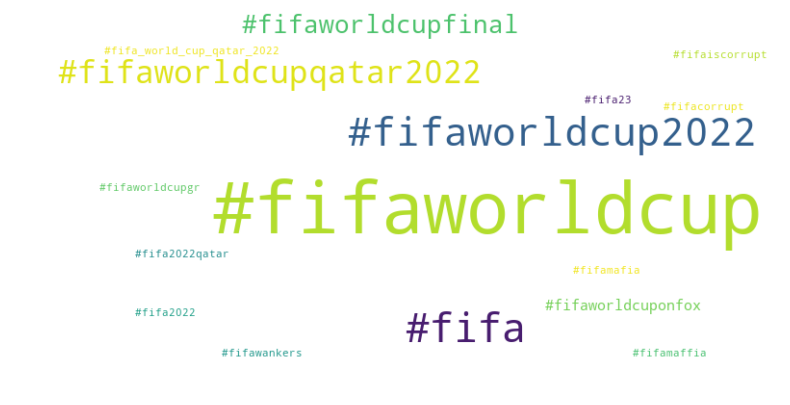

In [40]:
import nltk
from nltk import word_tokenize
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa and its variations
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(fifa_variations)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
!pip install wordcloud



^C


In [81]:
# 1. PORTER STEMMER AND LANCASTER STEMMER FOR MOST-COMMON WORDS

In [83]:
# 2. FILTERED TEXT
# 3. EXTRA-FILTERED TEXT
# 4. & 5. WORDCLOUDS WITH AND W-O STOPWORDS

Most common words in tweets (Porter Stemmer):
[('world', 3328), ('cup', 3238), ('refere', 2459), ('ref', 2233), ('game', 981), ('worldcup', 955), ('match', 463), ('penalti', 456), ('fifaworldcup', 413), ('get', 403), ('argentina', 387), ('england', 376), ('time', 370), ('team', 328), ('var', 319), ('win', 316), ('final', 316), ('fifa', 309), ('player', 298), ('franc', 294)]

Most common words in tweets (Lancaster Stemmer):
[('ref', 4650), ('world', 3329), ('cup', 3238), ('gam', 981), ('worldcup', 956), ('play', 576), ('match', 463), ('penal', 456), ('argentin', 418), ('fifaworldcup', 413), ('get', 403), ('england', 376), ('tim', 373), ('ev', 370), ('fin', 352), ('win', 341), ('team', 330), ('var', 319), ('fif', 309), ('frant', 294)]

Filtered Text:
first female referee men world cup philly tough north korea host world cup winning north korea allowed great leader referee every game wearing bracelet capital crime worldcup2022 northkorea bracelet fifaworldcup fifaworldcup2022 onelove wond

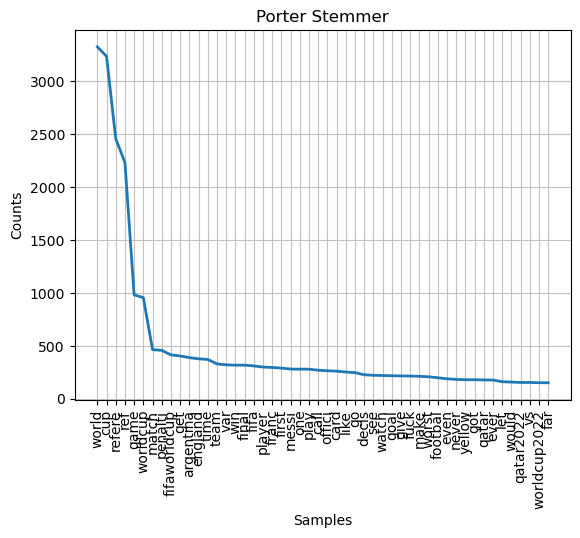

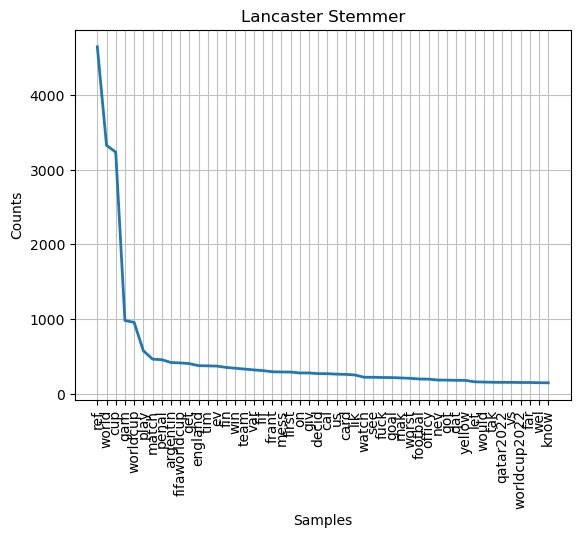

<Axes: title={'center': 'Lancaster Stemmer'}, xlabel='Samples', ylabel='Counts'>

In [48]:
# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
all_words = word_tokenize(all_text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]

# Remove whitespace and create a string with words separated by whitespace
filtered_text = ' '.join(filtered_words)

# Initialize stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

# Apply stemming to all words
porter_stems = [porter_stemmer.stem(word) for word in filtered_words]
lancaster_stems = [lancaster_stemmer.stem(word) for word in filtered_words]

# Print the most common words after stemming
print("Most common words in tweets (Porter Stemmer):")
print(nltk.FreqDist(porter_stems).most_common(20))

print("\nMost common words in tweets (Lancaster Stemmer):")
print(nltk.FreqDist(lancaster_stems).most_common(20))

# Display the filtered text
print("\nFiltered Text:")
print(filtered_text)

# Plot the frequency distribution of stemmed words
FreqDist(porter_stems).plot(50, cumulative=False, title="Porter Stemmer")
FreqDist(lancaster_stems).plot(50, cumulative=False, title="Lancaster Stemmer")


In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Read CSV file
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'
df = pd.read_csv(file_path)

# Combine all text in the 'column_name' column (replace 'column_name' with the actual column name containing your text)
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Define regular expression patterns for filtering
pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
whitespace_pattern = re.compile(r'\s+')
exclamation_hash_pattern = re.compile(r'[!#]')

# Remove stopwords, whitespaces, exclamation marks, and hashes; convert to lowercase
filtered_text = re.sub(pattern, '', all_text)
filtered_text = re.sub(whitespace_pattern, ' ', filtered_text)
filtered_text = re.sub(exclamation_hash_pattern, '', filtered_text)
filtered_text = filtered_text.lower()

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original words count:", len(word_tokenize(all_text)))
print("Filtered words count:", len(words))

print("Original text:", all_text[:1000])  # Displaying the first 1000 characters of the original text
print("\nFiltered text:", filtered_text[:1000])  # Displaying the first 1000 characters of the filtered text


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original words count: 123522
Filtered words count: 73516
Original text: The first female referee at a Men’s World Cup is from Philly. Tough 🔥 North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. 
#WorldCup2022 #NorthKorea
#Bracelet #FIFAWorldCup   
#FIFAWorldCup2022 #onelove If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54) NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”

World Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?” Possibly imagining it, but feel like there a

In [33]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Read CSV file
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'
df = pd.read_csv(file_path)

# Combine all text in the 'column_name' column (replace 'column_name' with the actual column name containing your text)
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Define regular expression patterns for filtering
stopwords_pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
punctuation_pattern = re.compile(r'[,.:"\'!?]')  # Add any additional punctuation marks you want to filter out
emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # Emojis
                           "\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # Transport & map symbols
                           "\U0001F700-\U0001F77F"  # Alchemical symbols
                           "\U0001F780-\U0001F7FF"  # Geometric shapes
                           "\U0001F800-\U0001F8FF"  # Supplemental arrows
                           "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                           "\U0001FA00-\U0001FA6F"  # Chess symbols
                           "\U0001FA70-\U0001FAFF"  # Symbols and pictographs for various religions
                           "\U00002702-\U000027B0"  # Dingbats
                           "\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# Remove stopwords, punctuation, and emojis; convert to lowercase
filtered_text = re.sub(stopwords_pattern, '', all_text)
filtered_text = re.sub(punctuation_pattern, '', filtered_text)
filtered_text = re.sub(emoji_pattern, '', filtered_text)
filtered_text = filtered_text.lower()

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original words count:", len(word_tokenize(all_text)))
print("Filtered words count:", len(words))

print("Original text:", all_text[:1000])  # Displaying the first 1000 characters of the original text
print("\nFiltered text:", filtered_text[:1000])  # Displaying the first 1000 characters of the filtered text


[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original words count: 123522
Filtered words count: 67529
Original text: The first female referee at a Men’s World Cup is from Philly. Tough 🔥 North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. 
#WorldCup2022 #NorthKorea
#Bracelet #FIFAWorldCup   
#FIFAWorldCup2022 #onelove If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54) NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”

World Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?” Possibly imagining it, but feel like there a

[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


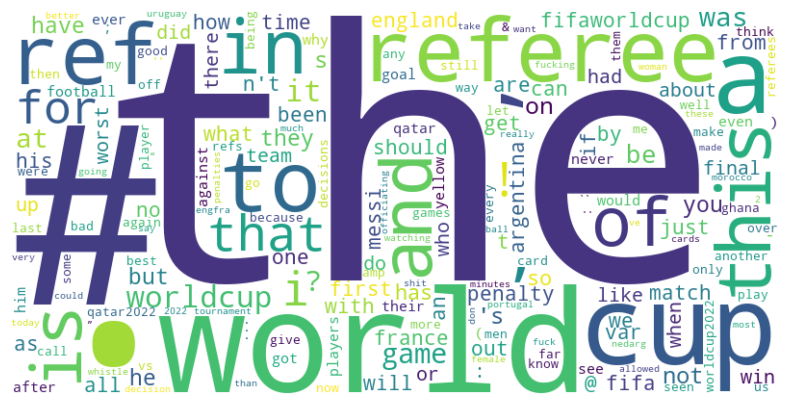

In [34]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from matplotlib import pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')

# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
words = word_tokenize(all_text.lower())  # Convert to lowercase for consistency

# Calculate the frequency distribution of words
freq_dist = FreqDist(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


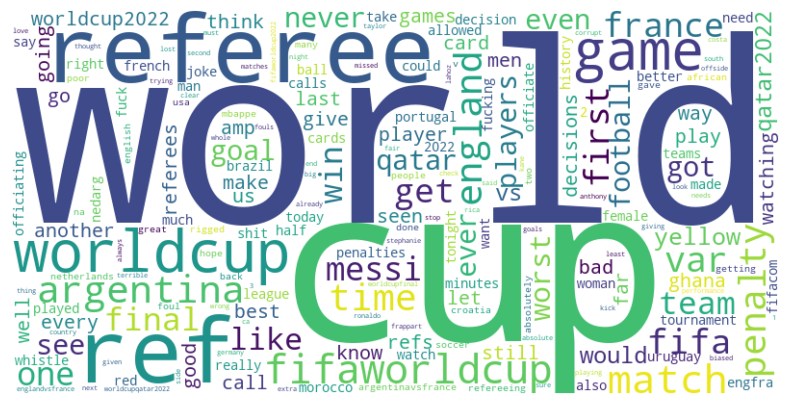

In [35]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from matplotlib import pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = 'C:/Users/Anes/Downloads/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
words = word_tokenize(all_text.lower())  # Convert to lowercase for consistency

# Extract stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the list of words
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Calculate the frequency distribution of filtered words
freq_dist = FreqDist(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
